# Machine Learning

## HSE, 2025-26

### Exam. Practical Part. Retake

Completed by: Shulyak Andrey

### Submission Format


Save your work file in .ipynb format (Python notebook) on the HSE computer and then, under the supervision of an assistant, transfer the work to the instructor's flash drive.

### About the task

You will work with the file **"California_Housing.csv"**

You are provided with a dataset containing information about housing in different districts of California based on the 1990 census data. The dataset consists of a single table.

Each row represents one California district, and the columns contain geographical information, demographic characteristics, and aggregated statistics about the housing in that district.

The dataset includes the following columns:

- longitude
- latitude
- housing median age
- total number of rooms
- total number of bedrooms
- population
- number of households
- median income
- median house value
- near ocean

Complete the following tasks using this dataset.

## Task 1. EDA (14 points)

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [82]:
df = pd.read_csv('California_Housing.csv')

### 1.1 (1 point)

Carefully examine the features of the main table. Which feature might be of significant interest for the study and serve as the target variable here? Justify your answer.

In [85]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
8836,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0
8837,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0
8838,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0
8839,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0


### Answer

So, let us start with the target variable we want to predict.
It is median_house_value

But in what features we can be very interested in. 

As we consider house (living space), we could access it, for example,
by longitude and latitude (see on the map, in what area the house is located), 

total_rooms(the number of rooms in the house), 

total_bedrooms(number of bedrooms in the house 

and median_income(by that we could understand who are our neighbors, what is their income, wealth and so on. In short: somehow imagine profile of a person and his status)

### 1.2 (2 points)

Perform the EDA step related to handling missing values. (Are there any missing values in the data? If there are, fill all the missing values appropriately). Justify your actions.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 0 to 8840
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           8841 non-null   float64
 1   latitude            8841 non-null   float64
 2   housing_median_age  8841 non-null   float64
 3   total_rooms         8841 non-null   float64
 4   total_bedrooms      8766 non-null   float64
 5   population          8841 non-null   float64
 6   households          8841 non-null   float64
 7   median_income       8841 non-null   float64
 8   median_house_value  8841 non-null   float64
 9   near_ocean          8841 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 690.8 KB


In [93]:
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        75
population             0
households             0
median_income          0
median_house_value     0
near_ocean             0
dtype: int64

Yes, there are missing values in our dataset.( Total_bedrooms)

Propose that all gaps in the current stage simply be filled in with the mean.(yes, it may be not the most intelligent way to do it. But the median would take may be the most realistic value, as a large amount of houses would have nearly the same amount of total bedrooms

In [97]:
df.fillna(df.mean(), inplace = True)

In [99]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
near_ocean            False
dtype: bool

### 1.3. (3 points)

Perform the EDA step related to correlations. (Determine which columns have a high correlation with the target variable, and identify any collinear features. Indicate whether this is good or bad for the subsequent analysis. Create a heatmap of correlations). Draw conclusions.

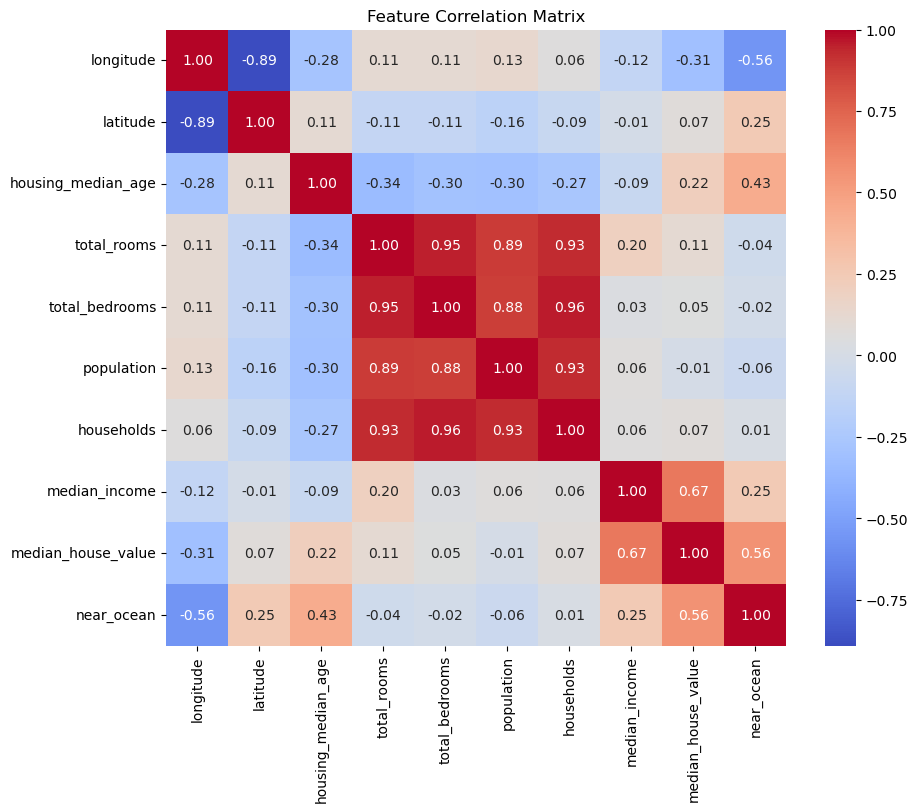

In [102]:
# Correlation between Numeric Variables

plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation Matrix')

plt.show()

### Conslusion

We start with correlation between different features and our target variable.

My assumption from task 1.1 worked correctly, and now you see. Median income really influence highly on our final price of the house. It could be simply expalain: our surrounding is describing you as a person. And therefor if rich guys are living nearby you we can conclude you are rich guy as well and have a propert that is expensive (and vice versa).

Near_ocean: exactly, how could i miss it before. Who would not to get up from bad and see the sea. It is wonderfull. But it's costly, therefore, your house is rising in price if it's located near by ocean

Housing_median_age: meaning the lower number is a newer building. That would also affect the Median_House_value as a new estate is appreceated on the marked highly. Because the new house has just been built, all new means of communication have been installed in it, and in general people haven’t had time to live in this living space before something breaks down there

Longitude: is also highly interested feature. You see, its correlation to Median_House_value is NEGATIVE. But what???
Why is it so?

Don't forget, We are in California! What does it mean for us, it is that higher longitude (moving futher east, away from the coast) negatively affects house prices. We could understand that the highest property values in California are concentrated on the coast (it is lower longitude). As one moves east (higher longitude) property values drop

And just a few words about other features(as time flies, i need to speed up)

You see this RED square in the middle (not Moscow one, but on correlation heatmap) 

These indicators are all related to amount of people that are there. That's why we would see the correlation between people living in and the number of rooms and so on.

### 1.4 (5 points)

Perform the EDA step related to visualizations. (Create at least 2 ***different*** types of significant visualizations within the framework of Univariate analysis and at least 2 different types within the framework of Multivariate analysis). Draw conclusions.

In [116]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
8836,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0
8837,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0
8838,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0
8839,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0


In [118]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
from IPython.display import IFrame

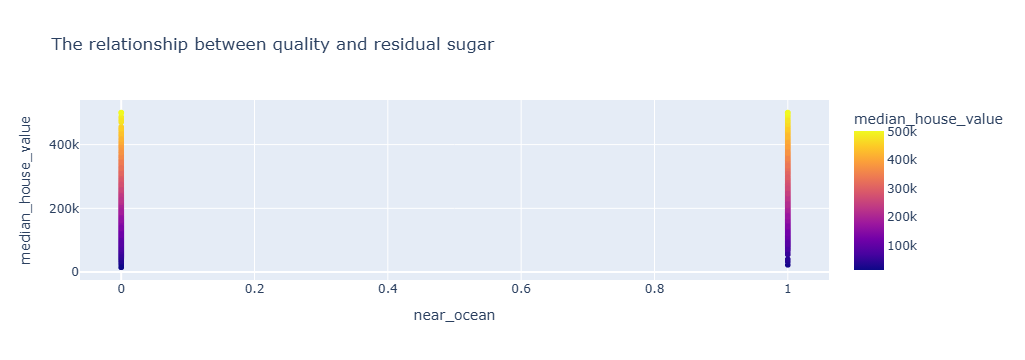

In [126]:
fig = px.scatter(df, x = 'near_ocean', y = 'median_house_value', 
                 color = 'median_house_value',
                title = 'The relationship between quality and residual sugar' )

fig.show()

We can conclude that not only rich estate is located on the sea side (near ocean). We have as as quite cheap house for 22 500  as high-cost buildings 450 000

### 1.5 (3 points)

Perform the EDA step related to initial hypotheses. (Formulate at least two ***meaningful*** hypotheses about the data that you can make at the initial data analysis (EDA) stage and that may subsequently help in the ML stage).

## Task 2. Machine Learning (24 points)

### 2.1 (5 points)

Create 3 different datasets: the original data; data with normalization; data with normalization and applied PCA.

Additionally, split the data into `train` and `test` in a 80% / 20% ratio and set the `seed` to `31012026`. What else should be considered when splitting the data?

*Hint*: You should end up with 8 arrays.

*Hint #2*: Should PCA be applied before or after splitting into `train` and `test`?

Justify all your actions!

### The original Data

In [39]:
X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state =31012026 )

here we simply separeted our target variable (median_house_value) from entire dataset. And also put all features(without target variable) as separate dataset. 
After that splited into train and test (with test size equals to 0.2 as was asked) + set random seed to the value 31012026

### The Data with Normalization

In [45]:
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test)

here applied Normalization by Standard Scaler

### The Data with Normalization and applied PCA

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

pca.fit(X_train_normed)

X_train_pca = pca.transform(X_train_normed)

X_test_pca = pca.transform(X_test_normed)

### 2.2 (5 points)

Create, run, and train at least 2 different types of machine learning models. The machine learning models should be of different nature.

### 1)Let's build linear model to predict median_house_value

In [53]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train_normed, y_train)
print(regr.score(X_test_normed, y_test))

0.6526260770393787


In [132]:
y_pred = regr.predict(X_test_normed)

### Classification

I want to divide the quality range into 2 parts. As the originally dataset presents the range of median_house_value from 15k to 500k with its median at 126 800. So, why not to make the border by 150 000.

- High quality (rich estate) - 1
- Other(medium and low level of estate) - 0

In [58]:
df['median_house_value'].median()

126800.0

In [60]:
class_df = df


In [62]:
class_df['median_house_value'] = np.where(class_df['median_house_value']>150000,1,0)

In [64]:
class_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1,1
...,...,...,...,...,...,...,...,...,...,...
8836,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,0
8837,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,0
8838,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,0
8839,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,0


In [66]:
X = class_df.drop('median_house_value', axis = 1)
y = class_df['median_house_value']

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = LogisticRegression()
clf.fit(X_train_normed, y_train)
y_pred_clf = clf.predict(X_test_normed)

In [69]:
accuracy_score(y_test, y_pred_clf)

0.0322215941209723

### 2.3 (6 points)

Make predictions with all your models on all 3 datasets (a total of 6 predictions).

Which quality metrics would be well-suited for this machine learning task? Choose at least two. Justify your choice.

Calculate these metrics for all predictions. Record the results in a `pd.DataFrame` table of size 6 by 2 (6 rows because there are 3 datasets and 2 metrics; 2 columns because there are 2 models).



In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error


### Regression for Original Data

In [154]:
#Regression 1
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

y_pred_1 = regr.predict(X_test)

0.6526260770393802


In [156]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAX_ERROR: ", max_error(y_test, y_pred))

MSE:  4056731640.5523005
MAE:  43353.164546682674
MAX_ERROR:  465326.5234832714


### Regression for The Data with Normalization

In [160]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train_normed, y_train)
print(regr.score(X_test_normed, y_test))

y_pred_2 = regr.predict(X_test_normed)

0.6526260770393787


In [162]:
print("MSE: ", mean_squared_error(y_test, y_pred_2))
print("MAE: ", mean_absolute_error(y_test, y_pred_2))
print("MAX_ERROR: ", max_error(y_test, y_pred_2))

MSE:  4056731640.5523005
MAE:  43353.164546682674
MAX_ERROR:  465326.5234832714


### Regression for Data with Normalization and pca

In [169]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train_pca, y_train)
print(regr.score(X_test_pca, y_test))

y_pred_3 = regr.predict(X_test_pca)

0.6178326600191596


In [171]:
print("MSE: ", mean_squared_error(y_test, y_pred_3))
print("MAE: ", mean_absolute_error(y_test, y_pred_3))
print("MAX_ERROR: ", max_error(y_test, y_pred_3))

MSE:  4463059077.297903
MAE:  45544.9406689924
MAX_ERROR:  471317.8524479692


### 2.4 (3 points)

Conduct a comparative analysis and comment on the results obtained in the previous section. Which algorithm performed best on which dataset and with which metric? Why do you think that is? Be sure to justify your answer.

It performs пипец как плохо. Кажется, я напутал где-то,  что-то в переменных. Но у меня уже нет времени, спасибо)

### 2.5 (5 points)

For any two of your models, perform hyperparameter tuning using cross-validation. Try running the algorithm with the found optimal hyperparameters and compare the results. Draw conclusions.